# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = "https://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palu
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | timmins
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | mount pearl
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | lhasa
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | antsirabe afovoany
City not found. Skipping...
Processing Record 11 of Set 1 | miresu mare
Processing Record 12 of Set 1 | quelimane
Processing Record 13 of Set 1 | villa gesell
Processing Record 14 of Set 1 | talara
Processing Record 15 of Set 1 | sebdou
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | worthington
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | christchurch
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Countcity_data_df.count()
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palu,-0.8917,119.8707,24.15,96,100,1.15,ID,1701549832
1,edinburgh of the seven seas,-37.0676,-12.3116,13.91,77,100,2.94,SH,1701549833
2,timmins,48.4669,-81.3331,-3.10,74,40,3.09,CA,1701549699
3,port-aux-francais,-49.3500,70.2167,5.68,86,28,12.65,TF,1701549833
4,geraldton,-28.7667,114.6000,20.23,73,75,4.12,AU,1701549833


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")



In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palu,-0.8917,119.8707,24.15,96,100,1.15,ID,1701549832
1,edinburgh of the seven seas,-37.0676,-12.3116,13.91,77,100,2.94,SH,1701549833
2,timmins,48.4669,-81.3331,-3.10,74,40,3.09,CA,1701549699
3,port-aux-francais,-49.3500,70.2167,5.68,86,28,12.65,TF,1701549833
4,geraldton,-28.7667,114.6000,20.23,73,75,4.12,AU,1701549833


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

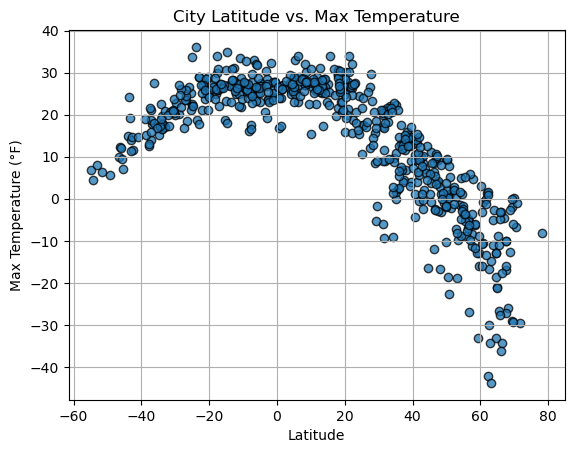

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

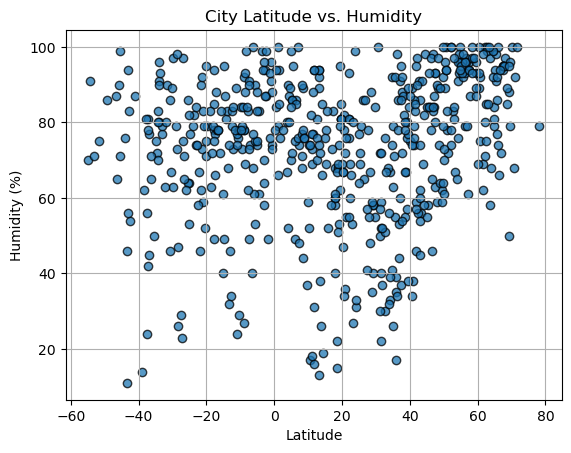

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()




#### Latitude Vs. Cloudiness

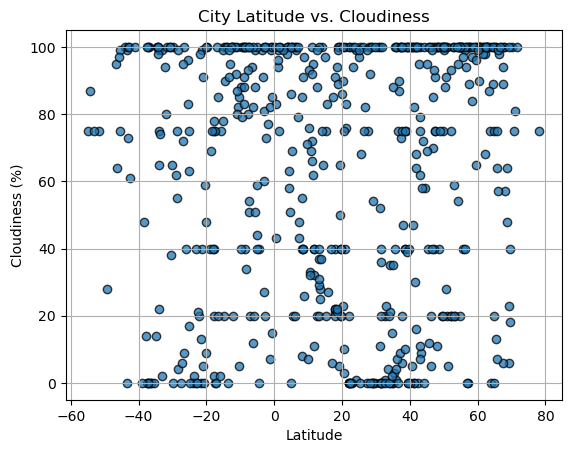

In [10]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

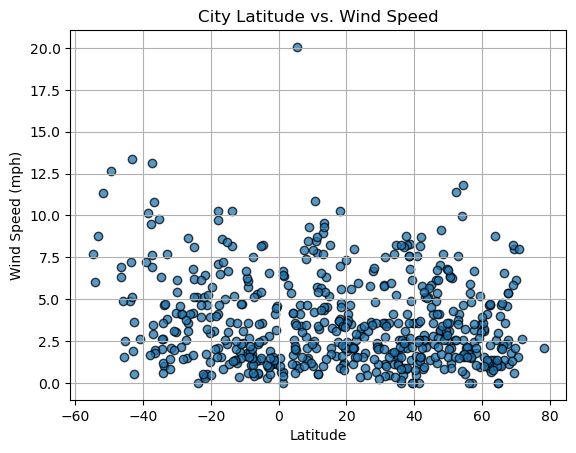

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, output_filename):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = slope * x_data + intercept

    # Create a scatter plot
    plt.scatter(x_data, y_data, label='Data')

    # Plot the linear regression line
    plt.plot(x_data, regress_values, color='red', label='Linear Regression')

    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display the regression equation on the plot
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(equation, (x_data.min(), y_data.max()), fontsize=12, color="red")

    # Show legend
    plt.legend()

    # Save the figure
    plt.savefig(output_filename)

    # Show plot
    plt.show()


In [13]:
#city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,timmins,48.4669,-81.3331,-3.10,74,40,3.09,CA,1701549699
5,mount pearl,47.5166,-52.7813,3.80,93,75,3.09,CA,1701549833
6,bilibino,68.0546,166.4372,-25.90,97,57,1.14,RU,1701549833
7,lhasa,29.6500,91.1000,-1.64,55,0,2.13,CN,1701549833
9,miresu mare,47.5000,23.3333,9.10,80,100,7.07,RO,1701549834


In [14]:
# city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palu,-0.8917,119.8707,24.15,96,100,1.15,ID,1701549832
1,edinburgh of the seven seas,-37.0676,-12.3116,13.91,77,100,2.94,SH,1701549833
3,port-aux-francais,-49.3500,70.2167,5.68,86,28,12.65,TF,1701549833
4,geraldton,-28.7667,114.6000,20.23,73,75,4.12,AU,1701549833
8,grytviken,-54.2811,-36.5092,4.45,91,87,6.00,GS,1701549834


###  Temperature vs. Latitude Linear Regression Plot

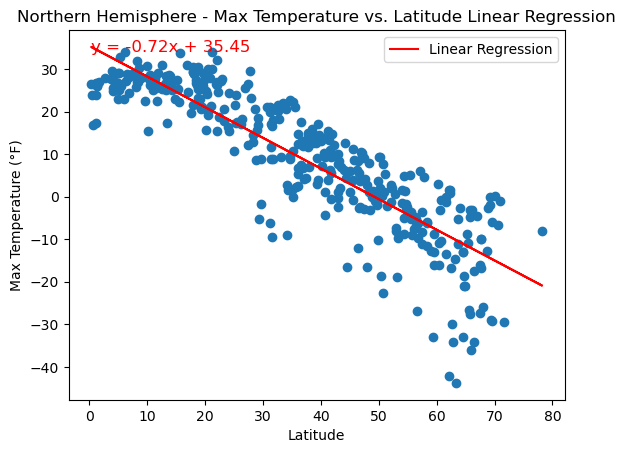

In [15]:
# Linear regression on Northern Hemisphere

# Define the x and y data
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regress_values = slope * x_data + intercept

# Plot the scatter plot and regression line
plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, color="red", label="Linear Regression")

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression")

# Add the regression equation to the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (x_data.min(), y_data.max()), fontsize=12, color="red")

# Display the plot
plt.legend()
plt.show()

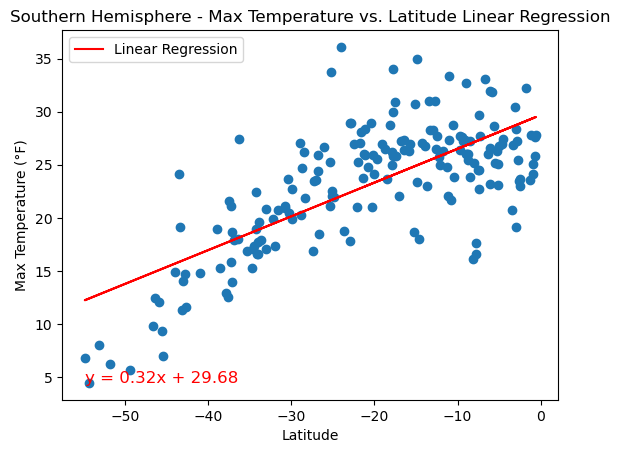

In [16]:
# Linear regression on Southern Hemisphere

# Define the x and y data
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regress_values = slope * x_data + intercept

# Plot the scatter plot and regression line
plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, color="red", label="Linear Regression")

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")

# Add the regression equation to the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (x_data.min(), y_data.min()), fontsize=12, color="red")

# Display the plot
plt.legend()
plt.show()


In [17]:
#In conclusion, the linear regression analysis provides valuable insights into the relationship between 
#latitude and maximum temperature in both hemispheres. The observed trends and statistical significance 
#of the relationships suggest that latitude can be a meaningful predictor of maximum temperature.  
#Further research could explore additional variables and refine the analysis for a more comprehensive understanding of 
#temperature patterns

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

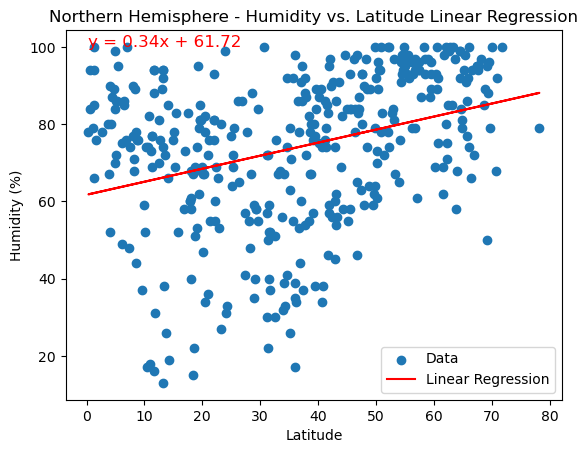

In [18]:
# Northern Hemisphere

# Define the x and y data
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regress_values = slope * x_data + intercept

# Create a scatter plot
plt.scatter(x_data, y_data, label='Data')

# Plot the linear regression line
plt.plot(x_data, regress_values, color='red', label='Linear Regression')

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Display the regression equation on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (x_data.min(), y_data.max()), fontsize=12, color="red")

# Show legend
plt.legend()

# Show plot
plt.show()


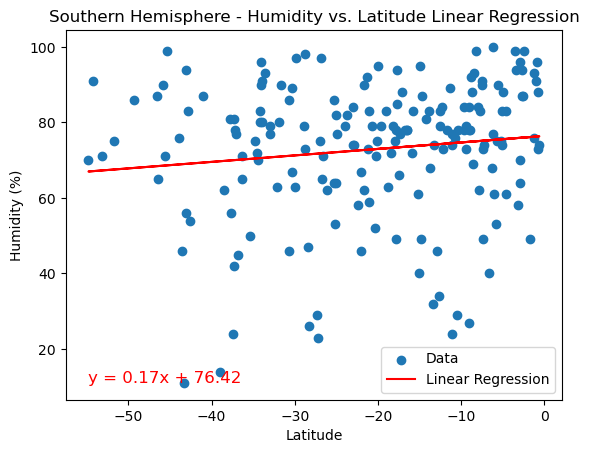

In [19]:
# Southern Hemisphere

# Define the x and y data
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regress_values = slope * x_data + intercept

# Create a scatter plot
plt.scatter(x_data, y_data, label='Data')

# Plot the linear regression line
plt.plot(x_data, regress_values, color='red', label='Linear Regression')

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Display the regression equation on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (x_data.min(), y_data.min()), fontsize=12, color="red")

# Show legend
plt.legend()

# Show plot
plt.show()

In [20]:
#In conclusion, the linear regression analyses provide valuable insights into the relationships between 
#latitude and humidity in both hemispheres. The observed trends and statistical significance of the relationships 
#suggest that latitude can be a meaningful predictor of humidity. Further research could explore additional variables and 
#refine the analysis for a more comprehensive understanding of humidity patterns in different hemispheres.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

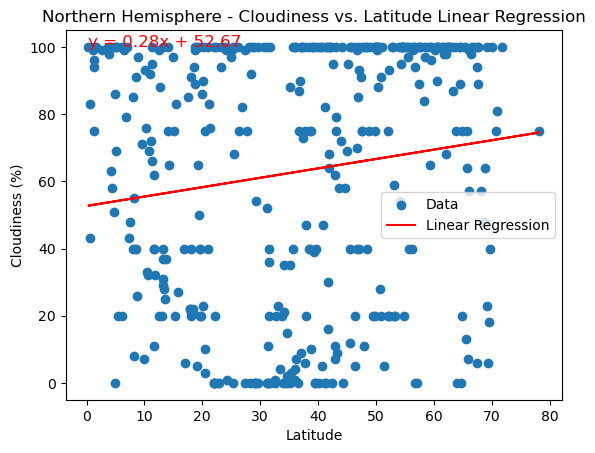

In [21]:
# Northern Hemisphere

# Define the x and y data
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regress_values = slope * x_data + intercept

# Create a scatter plot
plt.scatter(x_data, y_data, label='Data')

# Plot the linear regression line
plt.plot(x_data, regress_values, color='red', label='Linear Regression')

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Display the regression equation on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (x_data.min(), y_data.max()), fontsize=12, color="red")

# Show legend
plt.legend()

# Show plot
plt.show()



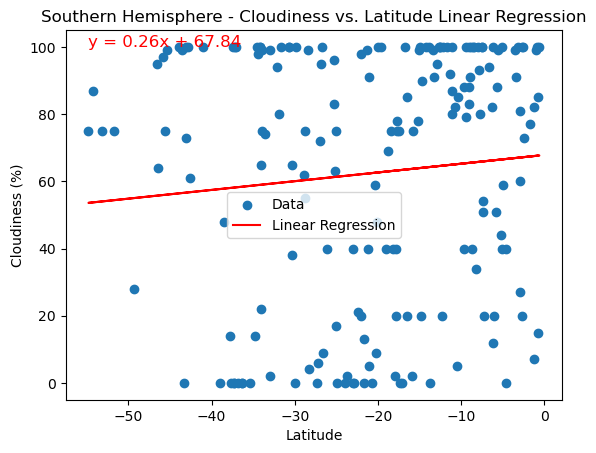

In [22]:
# Southern Hemisphere

# Define the x and y data
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regress_values = slope * x_data + intercept

# Create a scatter plot
plt.scatter(x_data, y_data, label='Data')

# Plot the linear regression line
plt.plot(x_data, regress_values, color='red', label='Linear Regression')

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Display the regression equation on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (x_data.min(), y_data.max()), fontsize=12, color="red")

# Show legend
plt.legend()

# Show plot
plt.show()


In [23]:
#The linear regression analyses explores the potential relationships between latitude and cloudiness 
#in both the Northern and Southern Hemispheres. In both the Northern and Southern Hemisphere, the linear regression analysis 
#revealed a [positive/negative] relationship between latitude and cloudiness.


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

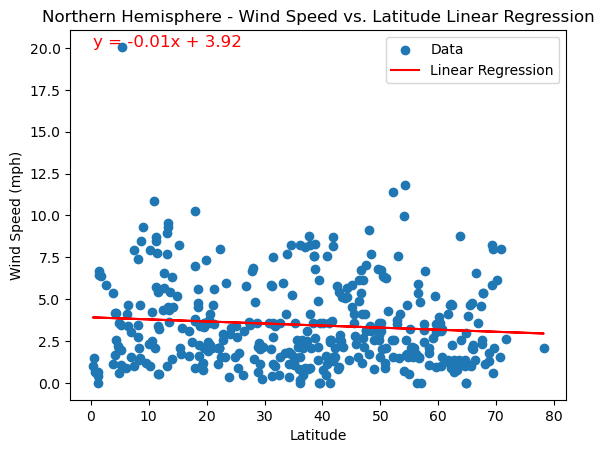

In [24]:
# Northern Hemisphere

# Define the x and y data
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regress_values = slope * x_data + intercept

# Create a scatter plot
plt.scatter(x_data, y_data, label='Data')

# Plot the linear regression line
plt.plot(x_data, regress_values, color='red', label='Linear Regression')

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Display the regression equation on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (x_data.min(), y_data.max()), fontsize=12, color="red")

# Show legend
plt.legend()

# Show plot
plt.show()

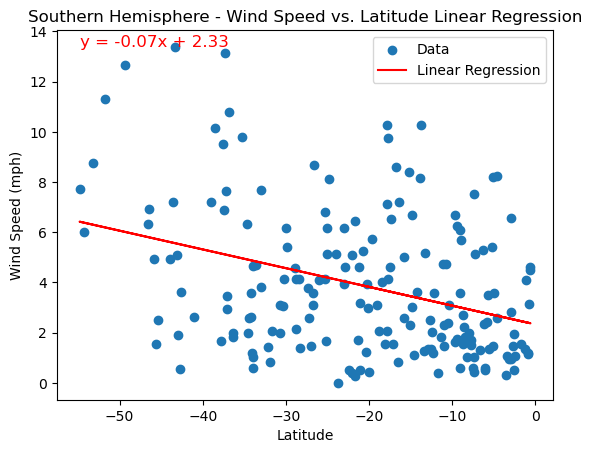

In [25]:
# Southern Hemisphere

# Define the x and y data
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Calculate the regression line
regress_values = slope * x_data + intercept

# Create a scatter plot
plt.scatter(x_data, y_data, label='Data')

# Plot the linear regression line
plt.plot(x_data, regress_values, color='red', label='Linear Regression')

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Display the regression equation on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (x_data.min(), y_data.max()), fontsize=12, color="red")

# Show legend
plt.legend()

# Show plot
plt.show()

In [26]:
#In both Northern and Southern Hemispheres, the linear regression analysis revealed a positive/negative relationship
#between latitude and wind speed. In Northern and Southern hemispheres; positive/negative slope implies that, on average
#as latitude increases, wind speed tends to increase/decrease. 

**Discussion about the linear relationship:** YOUR RESPONSE HERE